In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Load Data

In [122]:
logins = pd.read_json('C:/Users/Raymnd Diaz/GitHub/SpringboardWork/Ultimate Technologies Take Home/logins.json')
data = pd.read_json('C:/Users/Raymnd Diaz/GitHub/SpringboardWork/Ultimate Technologies Take Home/ultimate_data_challenge.json')

In [116]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [117]:
logins.shape

(93142, 1)

In [118]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


No null values from what we can tell

# Exploratory Data Analysis

In [3]:
logins = logins.set_index("login_time")
logins['count'] = 1

In [120]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [4]:
logins = logins.resample('15T', label='right').sum()

In [123]:
logins.shape

(9788, 1)

In [122]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [5]:
logins['time'] = pd.to_datetime(logins.index)

In [12]:
logins['month'] = logins.time.dt.month
logins['day'] = logins.time.dt.day
logins['year'] = logins.time.dt.year
logins['week'] = logins.time.dt.week
logins['weekday'] = logins.time.dt.weekday
logins['hour'] = logins.time.dt.hour

C:\Users\Raymnd Diaz\AppData\Local\Temp\ipykernel_13124\2772419218.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  logins['week'] = logins.time.dt.week


In [126]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   count    9788 non-null   int64         
 1   time     9788 non-null   datetime64[ns]
 2   month    9788 non-null   int64         
 3   day      9788 non-null   int64         
 4   year     9788 non-null   int64         
 5   week     9788 non-null   int64         
 6   weekday  9788 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 611.8 KB


Still no null values which is a good sign

In [13]:
logins.head()

,count,time,month,day,year,week,weekday,hour
login_time,,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,1970,1,3,20
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,1970,1,3,20
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,1970,1,3,20
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,1970,1,3,21
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,1970,1,3,21


In [95]:
logins.month.max()

4

In [7]:
logins.groupby('month')['count'].sum()

month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64

<AxesSubplot:xlabel='month'>

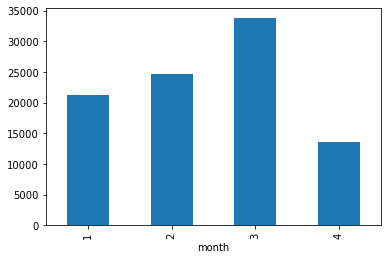

In [100]:
logins.groupby('month')['count'].sum().plot(kind='bar')

Volume seemed to increase month over month but there was a huge drop off in the start of Q2

In [8]:
logins.groupby('day')['count'].sum()

day
1     3183
2     3060
3     3443
4     4046
5     3232
6     3269
7     4025
8     4015
9     2839
10    3295
11    3851
12    3632
13    3004
14    3441
15    3327
16    2199
17    3074
18    2944
19    2843
20    2885
21    3489
22    3518
23    2234
24    2299
25    2355
26    2186
27    2708
28    3558
29    2194
30    1431
31    1563
Name: count, dtype: int64

<AxesSubplot:xlabel='day'>

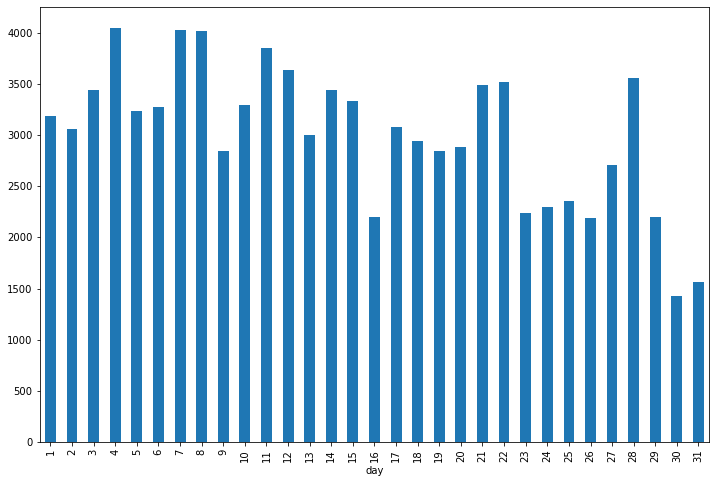

In [103]:
plt.figure(figsize=(12,8))
logins.groupby('day')['count'].sum().plot(kind='bar')

No clear trend from what I can tell here

In [9]:
logins.groupby('week')['count'].sum()

week
1     2368
2     5218
3     5021
4     4750
5     4747
6     5564
7     5914
8     7038
9     6554
10    7400
11    7329
12    8959
13    7284
14    8096
15    6496
16     404
Name: count, dtype: int64

<AxesSubplot:xlabel='week'>

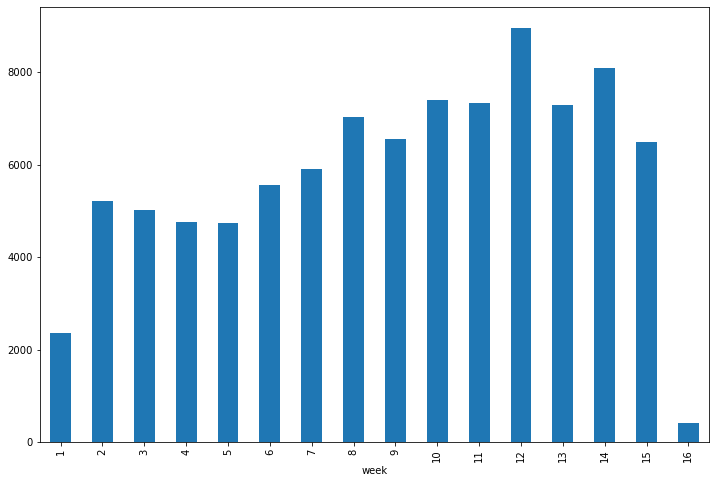

In [105]:
plt.figure(figsize=(12,8))
logins.groupby('week')['count'].sum().plot(kind='bar')

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

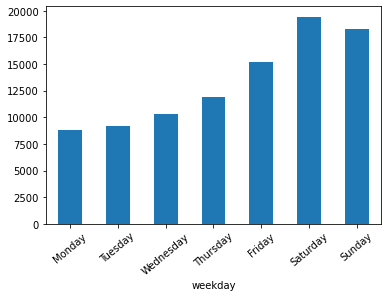

In [146]:
ax = (logins.groupby('weekday')['count'].sum()).plot(kind='bar')
plt.xticks(rotation=40)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

Trend here is that logins increase as we get closer to the weekend (Friday, Saturday and Sunday). Let's explore this more as a potential feature to use.

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

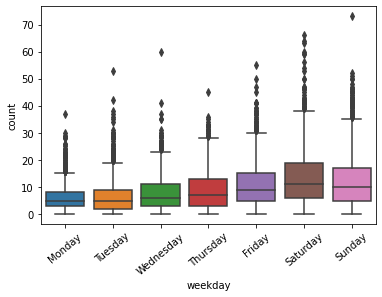

In [145]:
ax = sns.boxplot(data=logins,x='weekday',y='count')
plt.xticks(rotation=40)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

Friday and Saturday seem to have consistent login patterns
where as days like Wednesday and Sunday have outliers. So, potentially using weekday as a feature could work.

In [15]:
logins.groupby('hour')['count'].sum()

hour
0     5988
1     6302
2     5961
3     5075
4     4722
5     3892
6     1381
7      854
8      766
9     1273
10    2523
11    5251
12    5483
13    3761
14    3432
15    3187
16    2864
17    2607
18    2845
19    3180
20    3769
21    5284
22    6524
23    6218
Name: count, dtype: int64

<AxesSubplot:xlabel='hour'>

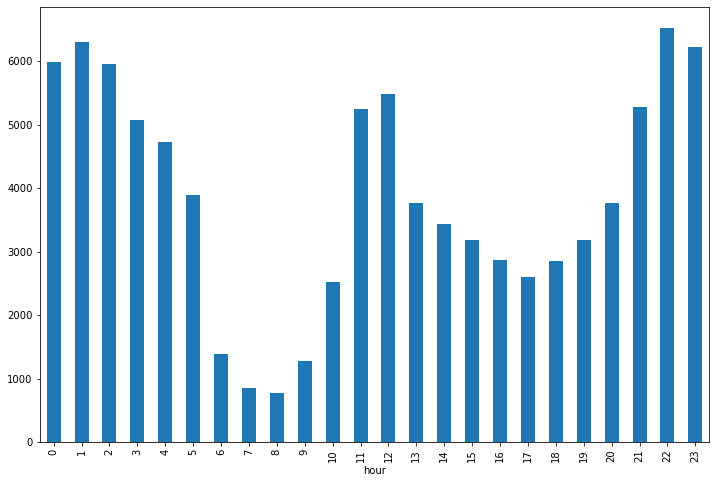

In [14]:
plt.figure(figsize=(12,8))
logins.groupby('hour')['count'].sum().plot(kind='bar')

We can see that logins are pretty strong through out the late evening into early morning where it dies down around 6-9 AM. Around lunch time is when it picks back up for a little bit and then it starts to level out to a consistent volume in the early evening before picking up again in the evening.

## Findings

1. Logins would increase consistently starting from Monday all the way to Saturday and Sunday. In addition to that, there are more logins on the weekend than the weekday. 
2. Logins steadily increased from January all the way to March
3. Most of the user logins occur in the late evening all the way to early morning (8pm to 2am). There was a spike at lunch time though for logins, signifying that maybe users would log in during their lunch breaks.


# Part 2 - Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

The key metric of success that I would choose as the metric of success for this experiment is to see what is the (total revenue generated from driver partners - total toll costs reimbursed) / number of drivers that serve both cities. I would also use ratio to compare to drivers that only serve in individual cities to see if reimbursing toll costs is worth it.

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
- how you will implement the experiment
-  what statistical test(s) you will conduct to verify the significance of the
observation
- how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

By utilizing hypothesis testing, we will be able to determine whether or not the volume of drivers that serve both cities is statistically significant enough to draw conlusions from.

We will be utilizing p-values, z-tests and t-tests to aid us in verifying our observations.

Lastly, we will be exploring visualizations around trends of rides between the specific cohorts and creating a presenttation that showcases our recommendations backed by our findings from our significance tests.

# Part 3 - Predictive Modeling

In [20]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [123]:
# Convert dates to datetime
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

Since 'avg_rating_of_driver' and 'avg_rating_by_driver' are important data points in visualizing whether or not

- Favorable drivers serve both cities
- Do customers like said drivers?
- How do low rated drivers perform when they serve both cities?

Lets impute the missing values with the mean of said columns.

For phones, since there are only about 396 phones missing out of a 50k sample, lets just drop those rows and move forward with our experiment since 49,604 records should be more than enough to confirm or reject our null hypothesis.

In [124]:
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean(), inplace=True)
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].mean(), inplace=True)
data.dropna(axis=0, inplace=True)

In [10]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-06-17,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-05-05,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-07,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-06-29,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-03-15,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

## EDA

Lets create barplots to look at the distribution between the categorical variables we have

In [125]:
categorical = ['city', 'phone', 'ultimate_black_user']

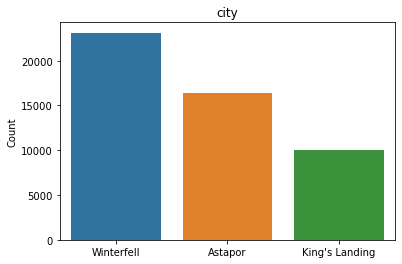

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


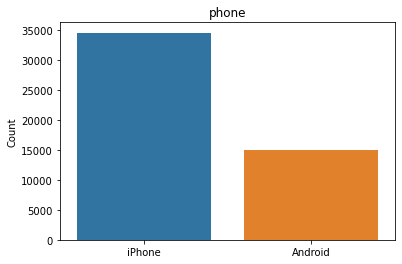

iPhone     34582
Android    15022
Name: phone, dtype: int64


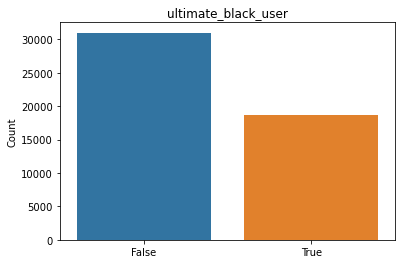

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [32]:
for cat in categorical:
    sns.barplot(data=data, x=data[cat].value_counts().index, y=data[cat].value_counts())
    plt.title(cat)
    plt.ylabel('Count')
    plt.show()
    print(data[cat].value_counts())

Lets look at our numerical features and look at the distributions between those now

In [33]:
numerical = ['trips_in_first_30_days','avg_rating_of_driver',
             'avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']

C:\Users\Raymnd Diaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


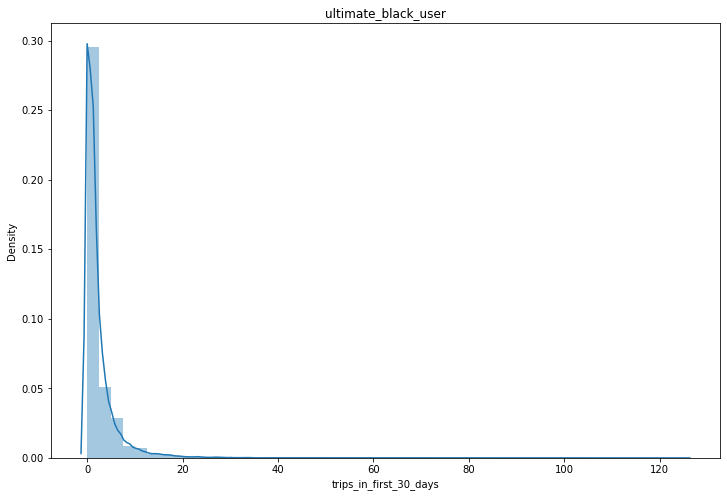

C:\Users\Raymnd Diaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


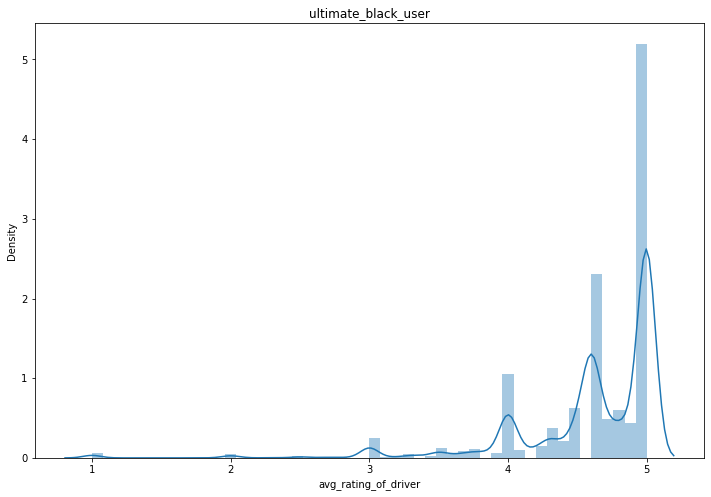

C:\Users\Raymnd Diaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


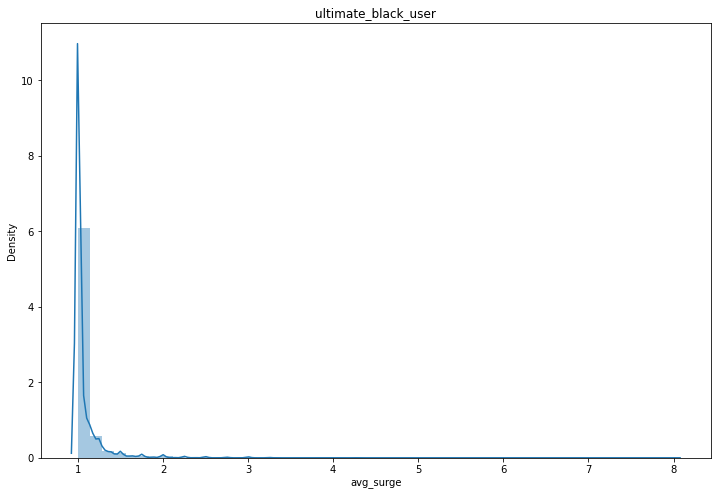

C:\Users\Raymnd Diaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


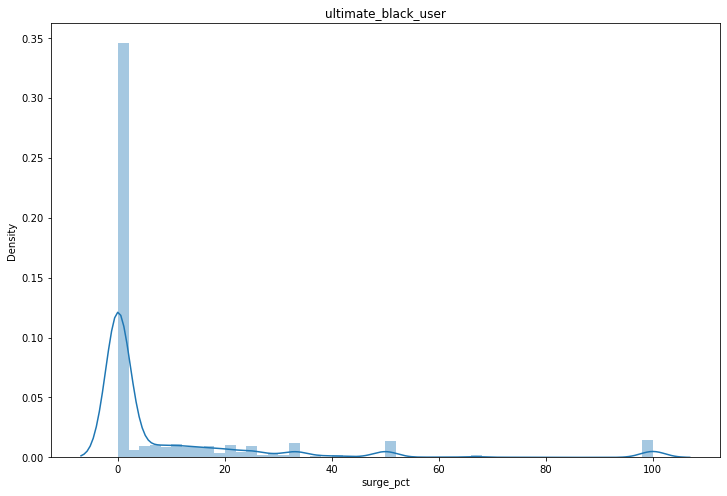

C:\Users\Raymnd Diaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


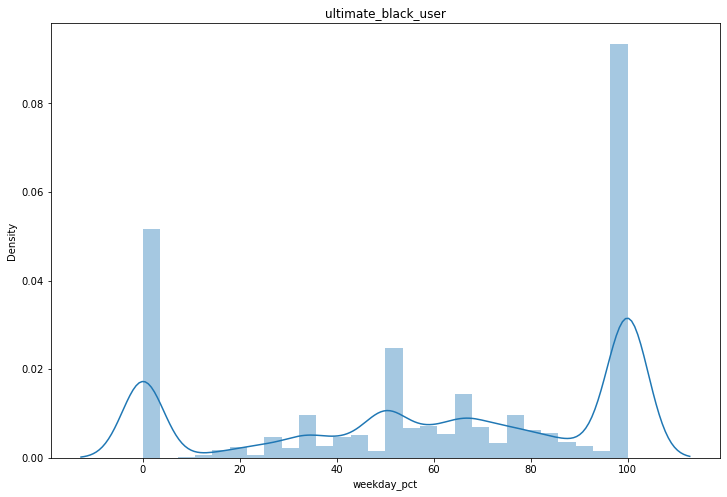

C:\Users\Raymnd Diaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


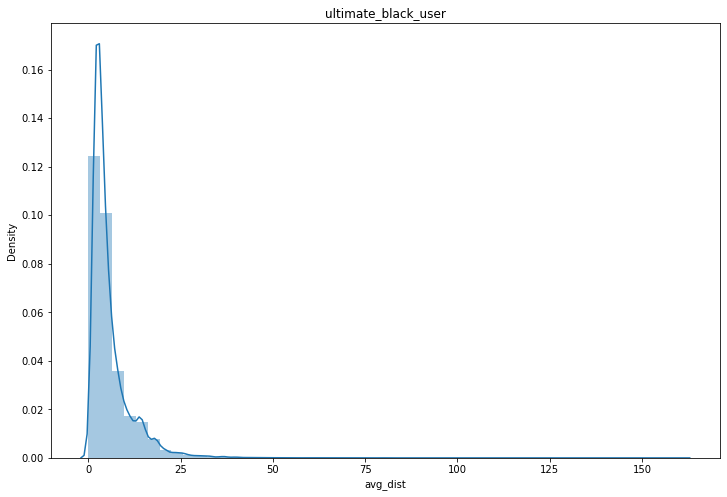

C:\Users\Raymnd Diaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


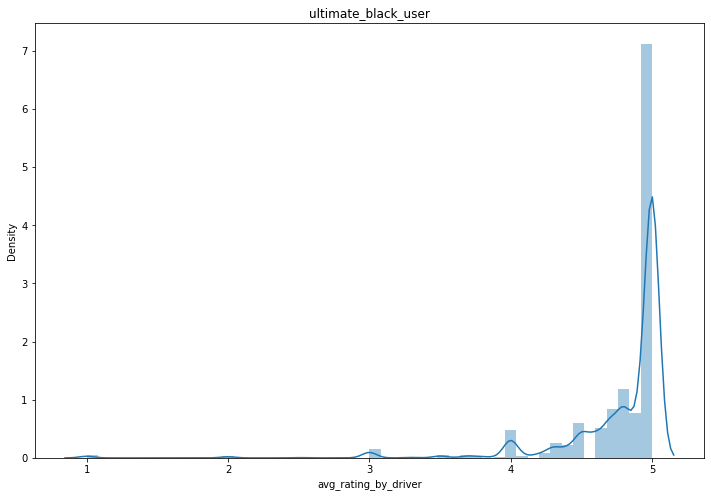

In [42]:
for num in numerical:
    plt.figure(figsize=(12,8))
    sns.distplot(data[num])
    plt.title(cat)
    plt.show()

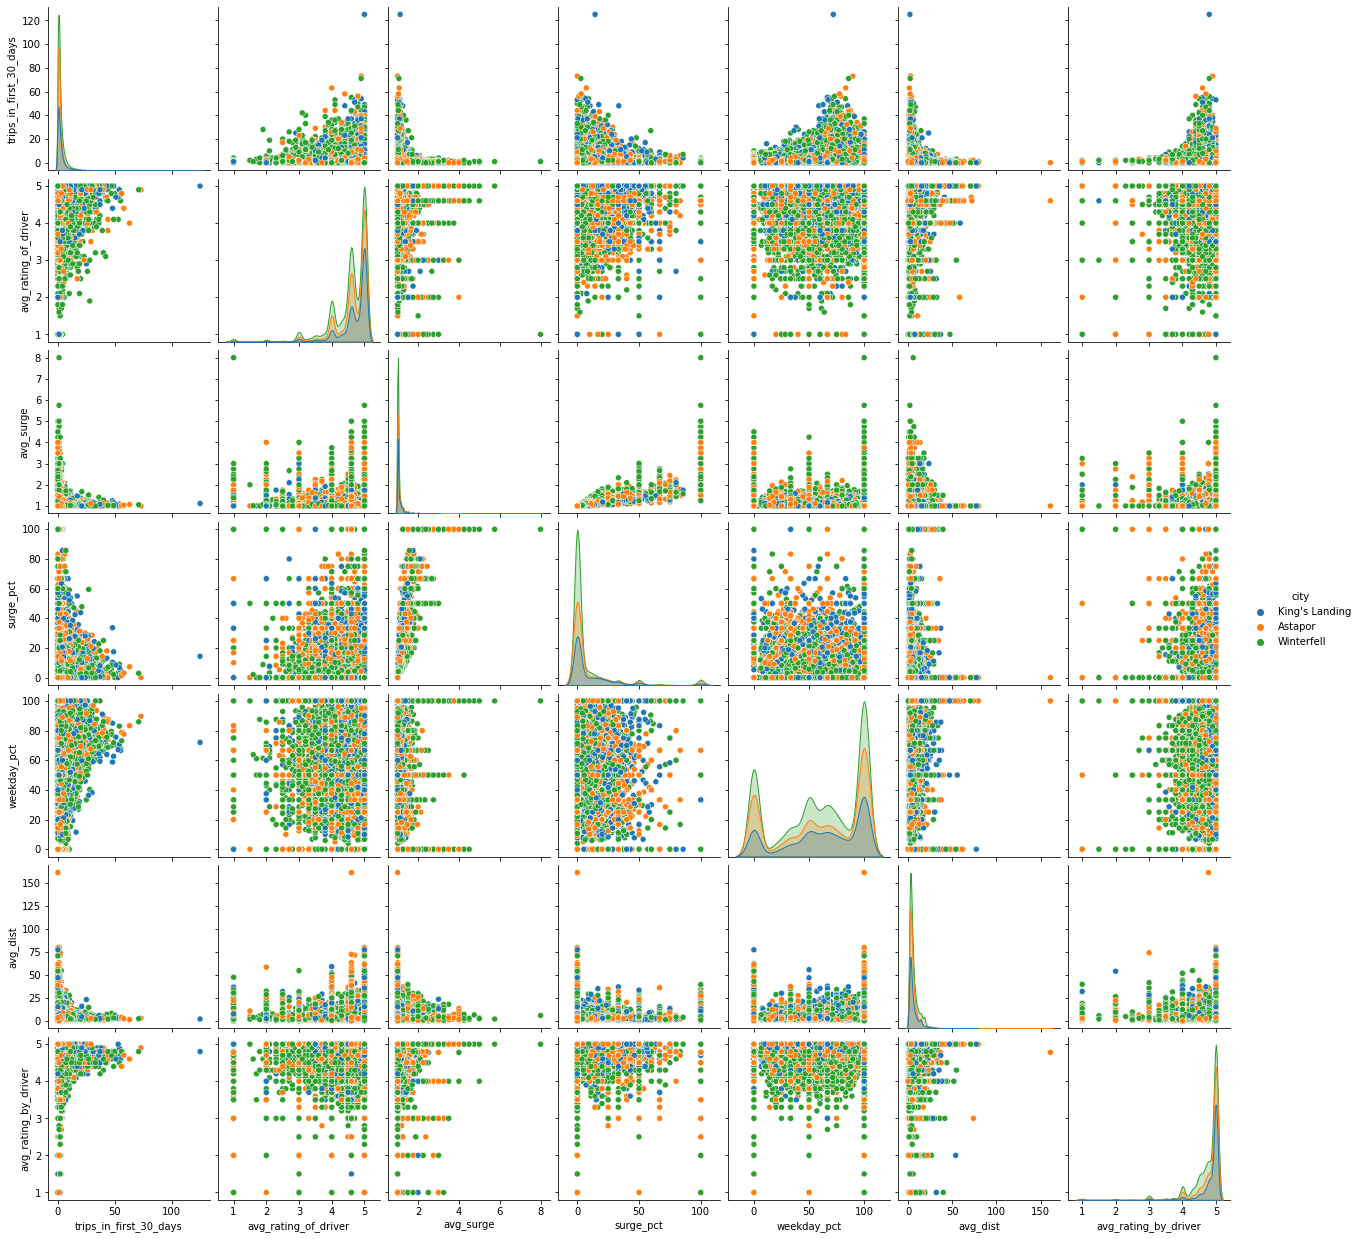

In [48]:
sns.pairplot(data.drop(['phone','ultimate_black_user','last_trip_date','signup_date'],axis=1),hue='city')

### Create a retained flag

Users that took a trip in the preceding 30 days are considered 'active'

In [53]:
data['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

Latest trip date appears to be 2014-07-01, so the last 30 days from then is 2014-06-01, so lets see what % users are considered active

In [60]:
retained = (len(data[data['last_trip_date'] > '2014-06-01'])/len(data)) * 100
print(str(retained) + "% of users were considered active")

36.65027013950488% of users were considered active


## Data Modeling

### 1. Prepare dataset

In [126]:
# Creating target variable
data['active'] = (data['last_trip_date'] > '2014-06-01')

In [63]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  active                  49604 non-null  int32 

In [127]:
# Drop datetime features since we won't need those
data.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [128]:
# Create dummy variables for the rest of our categorical variables
df = pd.get_dummies(data, columns=categorical, drop_first=True)

In [129]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,True,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,False,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,False,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,True,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,False,0,1,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   trips_in_first_30_days    49604 non-null  int64  
 1   avg_rating_of_driver      49604 non-null  float64
 2   avg_surge                 49604 non-null  float64
 3   surge_pct                 49604 non-null  float64
 4   weekday_pct               49604 non-null  float64
 5   avg_dist                  49604 non-null  float64
 6   avg_rating_by_driver      49604 non-null  float64
 7   active                    49604 non-null  int32  
 8   city_King's Landing       49604 non-null  uint8  
 9   city_Winterfell           49604 non-null  uint8  
 10  phone_iPhone              49604 non-null  uint8  
 11  ultimate_black_user_True  49604 non-null  uint8  
dtypes: float64(6), int32(1), int64(1), uint8(4)
memory usage: 4.4 MB


### 2. Split into test and training sets

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X = df.drop(['active'], axis=1)
y = df['active']

In [84]:
df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'active', 'city_King's Landing', 'city_Winterfell', 'phone_iPhone',
       'ultimate_black_user_True'],
      dtype='object')

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


### 3. Initial Model

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [174]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.76804838 0.75834698 0.76855235 0.76386089 0.76260081]
Average 5-Fold CV Score: 0.7642818813580332


In [143]:
# Let's look at feature importance for each feature
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,0.0242,0.015919,0.014255,0.040107,0.071121,0.013263,0.301559,0.171501,0.043292,0.210938,0.093845


### 4. Hyperparameter tuning

In [149]:
from sklearn.model_selection import GridSearchCV

In [209]:
# Create hyperparameter tuning grid
param_grid = {'n_estimators': [1, 25, 50, 75, 100],
               'max_features': ['auto', 'sqrt', 3, 5, 8],
               'max_depth': [1,2,3,4,5],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,4],
               'bootstrap': [True, False]}

In [210]:
# Classifier
rf = RandomForestClassifier()

# Grid Search
grid_cv = GridSearchCV(rf, param_grid, n_jobs=-1, cv=5, scoring="roc_auc", verbose=2)

# Fit
_ = grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 2250 candidates, totalling 11250 fits


In [215]:
# Predictions
preds = grid_cv.predict(X_test)

In [216]:
# Get the best score from hyperparameter tuning experiment
grid_cv.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=5, max_features='sqrt',
                       n_estimators=50)

In [217]:
# Get the best parameters from hyperparameter tuning experiment
grid_cv.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [218]:
grid_cv.best_score_

0.8379390721959247

It looks like by doing some hyperparameter tuning, we were able to increase the CV score by 7%!

The best estimator is below:

RandomForestClassifier(bootstrap=False, max_depth=5, max_features='sqrt',
                       n_estimators=50)

And the best parameters are below:

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

### 5. Final Modeling

In [219]:
rf = RandomForestClassifier(bootstrap=True, 
                           max_depth=5,
                           max_features='sqrt',
                           min_samples_leaf=1,
                           min_samples_split=2,
                           n_estimators=59)

rf.fit(X_train,y_train)
preds = rf.predict(X_test)

In [220]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [221]:
print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds)*100)

              precision    recall  f1-score   support

       False       0.79      0.88      0.83      6290
        True       0.74      0.59      0.66      3631

    accuracy                           0.78      9921
   macro avg       0.77      0.74      0.75      9921
weighted avg       0.77      0.78      0.77      9921

77.65346235258542


Text(0.5, 1.0, 'ROC Curve')

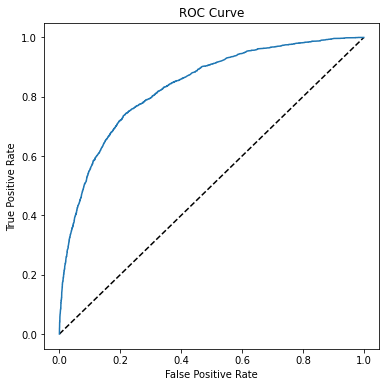

In [222]:
y_pred_prob = rf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [224]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8345


Final Model Stats:

- AUC: 0.8345
- Test Set Accuracy: 77.65%

In [227]:
feature_importance = pd.DataFrame(list(zip(X.columns, rf.feature_importances_)), columns = ['features', 'importance'])
feature_importance.sort_values(by='importance',ascending=False)

,features,importance
6,avg_rating_by_driver,0.258198
7,city_King's Landing,0.171580
3,surge_pct,0.153653
2,avg_surge,0.104250
9,phone_iPhone,0.103511
4,weekday_pct,0.081907
10,ultimate_black_user_True,0.064897
0,trips_in_first_30_days,0.049030
5,avg_dist,0.006368
1,avg_rating_of_driver,0.003839


### 6. Conclusion

The recommendation I would give to Ultimate is to:
    
1. Ensure that the drivers are providing the best customer service possible to ensure that they get higher ratings from riders. Better customer rating, means happier riders, means more rides.
2. Prioritize having more drivers in King's Landing
3. Reducing surge and how long that surge lasted would make it so that riders didn't spend time waiting for surges to die down so that they don't spend as much money